In [1]:
#importing the required python libraries for analysis and visualizations
import numpy as np
import pandas as pd
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
%matplotlib inline

In [2]:
#loading the data set
df=pd.read_csv('C:\Data\heart attack analysis and prediction.csv')
#displayiing 10 top rows
df.head(10) 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
#view dimensions of the data
df.shape

(303, 14)

In [4]:
#a code to show features of the data in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Dropping some irrelevant columns
df = df.drop(['cp', 'fbs','restecg','exang','slp','caa','thall'], axis=1)
# Displaying the first ten rows
df.head(10)

,age,sex,trtbps,chol,thalachh,oldpeak,output
0,63,1,145,233,150,2.3,1
1,37,1,130,250,187,3.5,1
2,41,0,130,204,172,1.4,1
3,56,1,120,236,178,0.8,1
4,57,0,120,354,163,0.6,1
5,57,1,140,192,148,0.4,1
6,56,0,140,294,153,1.3,1
7,44,1,120,263,173,0.0,1
8,52,1,172,199,162,0.5,1
9,57,1,150,168,174,1.6,1


In [6]:
#checking for any duplicate values in the data set
duplicateValues= df.duplicated()
print(duplicateValues.sum()) 

1


In [7]:
#removing duplicate values
df.drop_duplicates(inplace=True)
duplicateValues= df.duplicated()
print(duplicateValues.sum())

0


In [8]:
#checking summary statistics for the data 
numerical = [var for var in df.columns if df[var].dtype!='O']
#viewing summary statistics for the data 
print(round(df[numerical].describe()))

         age    sex  trtbps   chol  thalachh  oldpeak  output
count  302.0  302.0   302.0  302.0     302.0    302.0   302.0
mean    54.0    1.0   132.0  246.0     150.0      1.0     1.0
std      9.0    0.0    18.0   52.0      23.0      1.0     0.0
min     29.0    0.0    94.0  126.0      71.0      0.0     0.0
25%     48.0    0.0   120.0  211.0     133.0      0.0     0.0
50%     56.0    1.0   130.0  240.0     152.0      1.0     1.0
75%     61.0    1.0   140.0  275.0     166.0      2.0     1.0
max     77.0    1.0   200.0  564.0     202.0      6.0     1.0


<AxesSubplot:xlabel='oldpeak'>

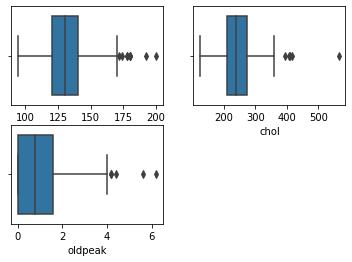

In [9]:
#a box plot for resting blood pressure
plt.subplot(2, 2, 1)
sns.boxplot(x=df['trtbps'])
#a box plot for cholestrol levels
plt.subplot(2, 2, 2)
sns.boxplot(x=df['chol'])
#a box plot for previous peak
plt.subplot(2, 2, 3)
sns.boxplot(x=df['oldpeak'])

Text(0, 0.5, 'age')

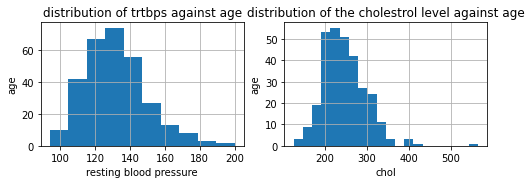

In [10]:
# Plotting a Histograms to show distributions
# Plotting a Histogram to show distribution of resting blood pressure against age
plt.figure(figsize=(8,5))
plt.subplot(2, 2, 1)
plt.title("distribution of trtbps against age")
fig = df.trtbps.hist(bins=10)
fig.set_xlabel('resting blood pressure')
fig.set_ylabel('age')
# Plotting a Histogram to show distribution of cholestrol level against age
plt.subplot(2, 2, 2)
plt.title("distribution of the cholestrol level against age")
fig = df.chol.hist(bins=20)
fig.set_xlabel('chol')
fig.set_ylabel('age')

<AxesSubplot:>

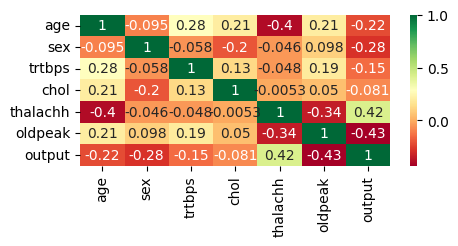

In [11]:
# Plotting a heatmap to show the relationship between variables
plt.figure(figsize = (5,2),dpi = 100)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') 

<AxesSubplot:xlabel='age', ylabel='output'>

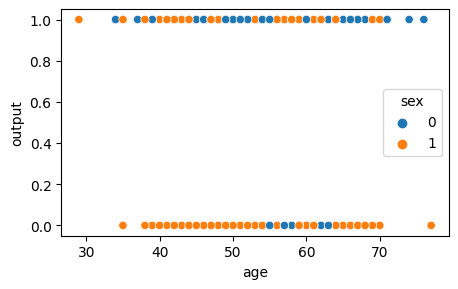

In [12]:
# a scatter plot of chance of heart attack (ouput), sex against age
plt.figure(figsize = (5,3),dpi = 100)
sns.scatterplot(data = df , x = 'age',y='output',hue='sex')

In [13]:
# feature selection for the model
# selecting age, sex, resting blood pressure, cholestrol levels as the independent variables
X = df[['age','sex','trtbps','thalachh','chol']]
# selecting 'output' (chance of heart attack) as the target variable
y = df['output']

In [14]:
# getting the train_test_split helper function for splitting the data into testing & training sets
from sklearn.model_selection import train_test_split
# splittiing X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
# checking the shape of training set (X_train) and test set(X_test)
X_train.shape, X_test.shape

((241, 5), (61, 5))

In [16]:
# importing the Logistic Regression Object for performing Logistic Regression
from sklearn.linear_model import LogisticRegression
# Creating a Logistic Regression Object and generating the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=0)
#fit the model into the training set
log_reg.fit(X_train, y_train)
print(log_reg)

LogisticRegression(random_state=0, solver='liblinear')


In [17]:
# importing the confusion matrix object from sklearn.metrics module to calculate the confusion matrix
from sklearn.metrics import confusion_matrix
# Predicting the results in the test set
y_pred = log_reg.predict(X_test)
# assigning the confusion matrix function a name 'cm'
cm = confusion_matrix(y_test, y_pred)
# Print the Confusion Matrix and divide it into the 4 outcomes
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[24  6]
 [ 3 28]]

True Positives(TP) =  24

True Negatives(TN) =  28

False Positives(FP) =  6

False Negatives(FN) =  3


<AxesSubplot:>

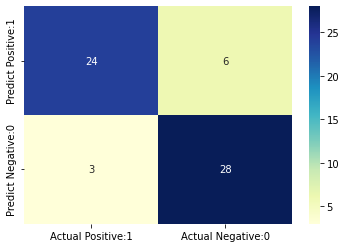

In [18]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [19]:
# getting the four outcomes from the confusion matrix
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# calculate precision score
precision = TP / float(TP + FP)
# print precision score
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8000


In [20]:
# calculate recall/sensitivity score
recall = TP / float(TP + FN)
# print recall/sensitivity score
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8889


In [21]:
# print the accuracy scores on training and test set
print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.6763
Test set score: 0.8525


In [22]:
# hyperparameter optimization using the GridsearchCV
from sklearn.model_selection import GridSearchCV
# penalizing the parameters using l1 and l2 penalty under different values of C 
parameters = [{'penalty':['l1','l2']}, 
              {'C':[10, 100]}]
# initiating the GridSearch cv function 
grid_search = GridSearchCV(estimator = log_reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# printing the results
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [10, 100]}],
             scoring='accuracy')

In [23]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print the parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.6891


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [24]:
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8361


In [ ]:
# end 